In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score




In [ ]:
url ='https://raw.githubusercontent.com/ZarCab/csv/main/diabetes.csv'

dataset = pd.read_csv(url)

len(dataset)

dataset.head()

################################################ Preparing Data
#listing column name that cant be zero
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for column in zero_not_accepted:
  #first is replacing zero with np.NaN
  dataset[column] = dataset[column].replace(0,np.NaN)
  #get mean Skipping np.Nan
  mean = int (dataset[column].mean(skipna =True))
  #replacing np.Nan with mean
  dataset[column] = dataset[column].replace(np.NaN, mean)

################################################# End Prep






In [ ]:
################################################# Splitting Data
X = dataset.iloc[:,0:8]##Features
y = dataset.iloc[:,8]  ##target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size =0.2)



################################################# End Splitting Data

In [ ]:
################################################# Scale Data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

################################################# End Scale Data

In [ ]:
################################################# choosing K
import math


math.sqrt(len(y_test))

##choose odd number

################################################# choosing K End

12.409673645990857

In [ ]:
################################################# Creating Classifier

classifier = KNeighborsClassifier(n_neighbors=11, p=2 ,metric='euclidean')
classifier

################################################# Creating Classifierens

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
################################################# Fit Model

classifier.fit(X_train, y_train)

################################################# Fit Model End

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
################################################# Predicti test

y_pred = classifier.predict(X_test)
y_pred
################################################# Predicti test end

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[94, 13],
       [15, 32]])

In [ ]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[94 13]
 [15 32]]
0.6956521739130436


In [ ]:
print(accuracy_score(y_test, y_pred))

0.8181818181818182


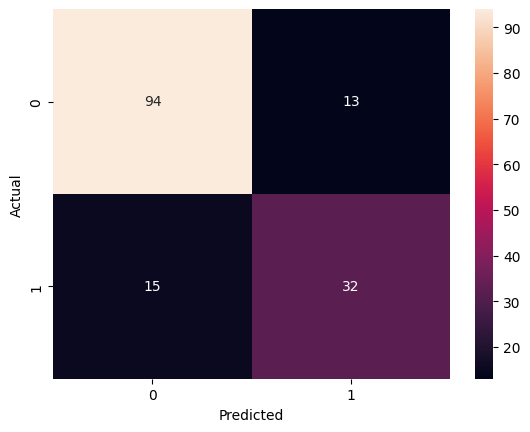

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       107
           1       0.71      0.68      0.70        47

    accuracy                           0.82       154
   macro avg       0.79      0.78      0.78       154
weighted avg       0.82      0.82      0.82       154



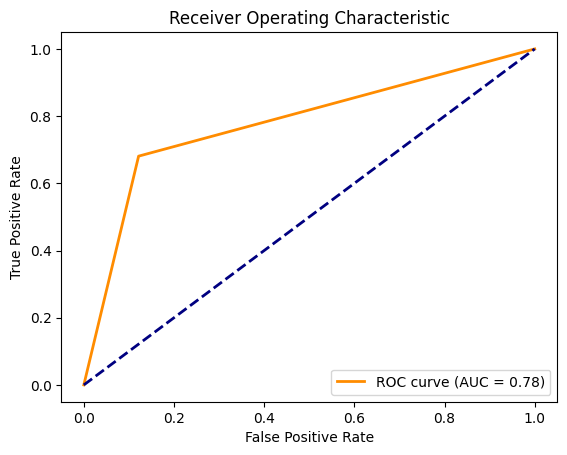

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()